In [7]:
import pandas as pd

# Asegúrate de usar el nombre correcto del archivo
df = pd.read_csv('Titanic-Dataset.csv')

# Vista inicial de los datos
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Estadísticas descriptivas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.30

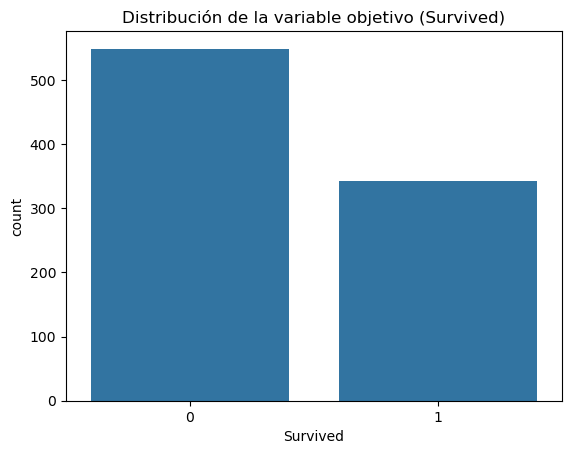

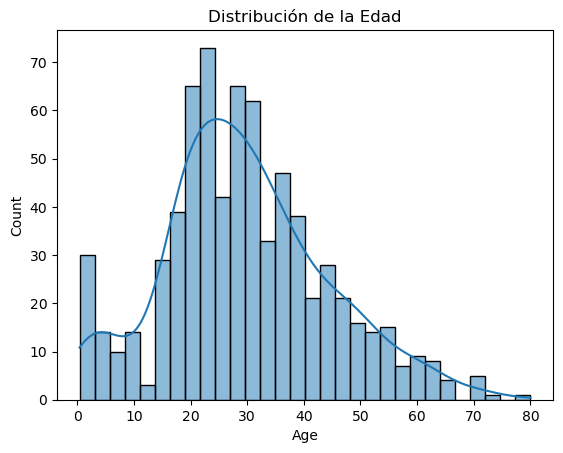

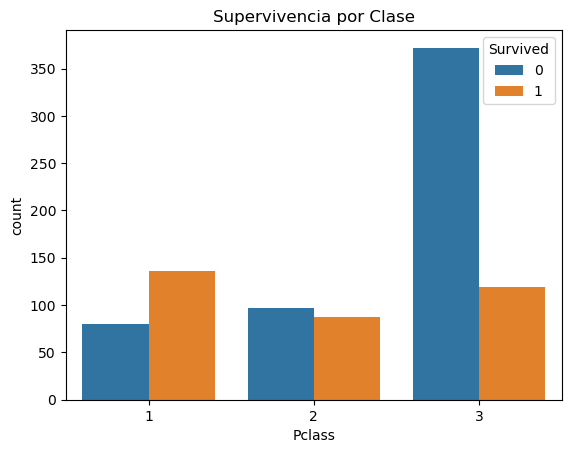

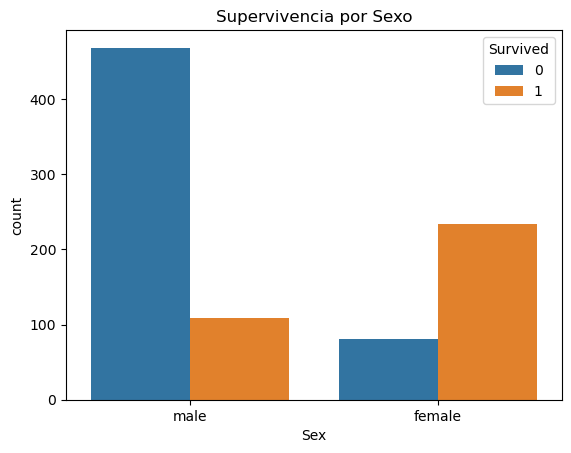

In [11]:
# Información general del dataset
print("Información general del dataset:")
print(df.info())

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Distribuciones y análisis básicos
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable objetivo (Survived)
sns.countplot(x='Survived', data=df)
plt.title('Distribución de la variable objetivo (Survived)')
plt.show()

# Distribución de la edad
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.show()

# Relación entre Pclass y supervivencia
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Supervivencia por Clase')
plt.show()

# Relación entre Sexo y supervivencia
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Supervivencia por Sexo')
plt.show()

In [13]:
# Manejo de valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin_known'] = df['Cabin'].notnull().astype(int)
df.drop('Cabin', axis=1, inplace=True)

# Conversión de variables categóricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Eliminación de columnas irrelevantes
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Escalado de la variable Fare
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

# Verificación final
print("Dataset preprocesado:")
print(df.info())
print(df.head())

C:\Users\Estiven\AppData\Local\Temp\ipykernel_25588\2102528169.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Estiven\AppData\Local\Temp\ipykernel_25588\2102528169.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Dataset preprocesado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Cabin_known  891 non-null    int32  
 7   Sex_male     891 non-null    bool   
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int32(1), int64(4)
memory usage: 48.0 KB
None
   Survived  Pclass   Age  SibSp  Parch      Fare  Cabin_known  Sex_male  \
0         0       3  22.0      1      0 -0.502445            0      True   
1         1       1  38.0      1      0  0.786845            1     False   
2         1       3  26.0      0      0 -0.488854            0    

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar características (X) y la variable objetivo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"R^2 (Coeficiente de Determinación): {r2:.4f}")

MSE (Error Cuadrático Medio): 0.1338
R^2 (Coeficiente de Determinación): 0.4484


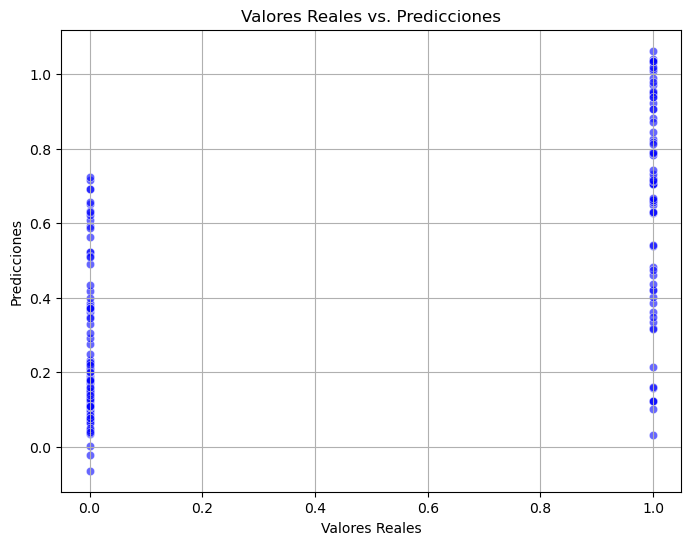

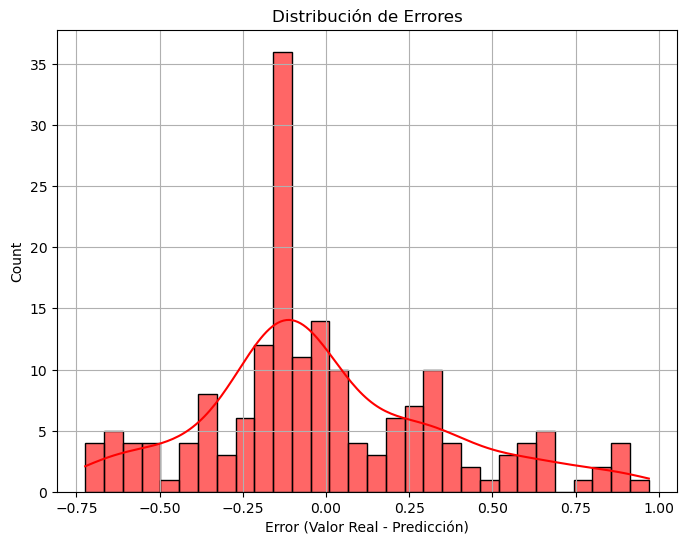

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico 1: Valores reales vs. predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.grid(True)
plt.show()

# Gráfico 2: Distribución del error
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, bins=30, color="red", alpha=0.6)
plt.xlabel("Error (Valor Real - Predicción)")
plt.title("Distribución de Errores")
plt.grid(True)
plt.show()